In [1]:
import math
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [2]:
# 0. Cargar los datos de estatura y peso
url = 'http://wiki.stat.ucla.edu/socr/index.php?title=SOCR_Data_Dinov_020108_HeightsWeights&oldid=12529'

height_weight_df = pd.read_html(url)[1][['Height(Inches)','Weight(Pounds)']]

In [3]:
# 1. Count records in the dataframe
# 2. Crear una regresion lineal con estatura como variable explicatoria y peso como variable explicada
# 3. Hallar el intercepto
# 4. Hacer la grafica
# 5. Hallar correlacion y valor p
# 6. Interpretar el valor p

In [4]:
#Inciso 1 Count records in the dataframe
print(height_weight_df.shape[0])

200


In [5]:
# 2. Crear una regresion lineal con estatura como variable explicatoria y peso como variable explicada

# Dividir los datos en variables explicativas (X) y variable explicada (y)
X = height_weight_df[['Height(Inches)']]  # Variable explicativa
y = height_weight_df[['Weight(Pounds)']]  # Variable explicada

# Dividir los datos en conjuntos de entrenamiento y prueba

# Crear el modelo de regresión lineal
modelo = linear_model.LinearRegression()

# Entrenar el modelo
modelo.fit(X, y)


LinearRegression()

In [6]:
# 3. Hallar el intercepto

# Obtener y mostrar el coeficiente e intercepto
intercepto = modelo.intercept_[0]
print(f'Intercepto: {intercepto}')


Intercepto: -106.02770644878126


C:\Users\DELL\AppData\Local\Temp\ipykernel_18388\1902047122.py:18: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  X_range = pd.DataFrame({'Height(Inches)': range(int(X.min()), int(X.max()))})


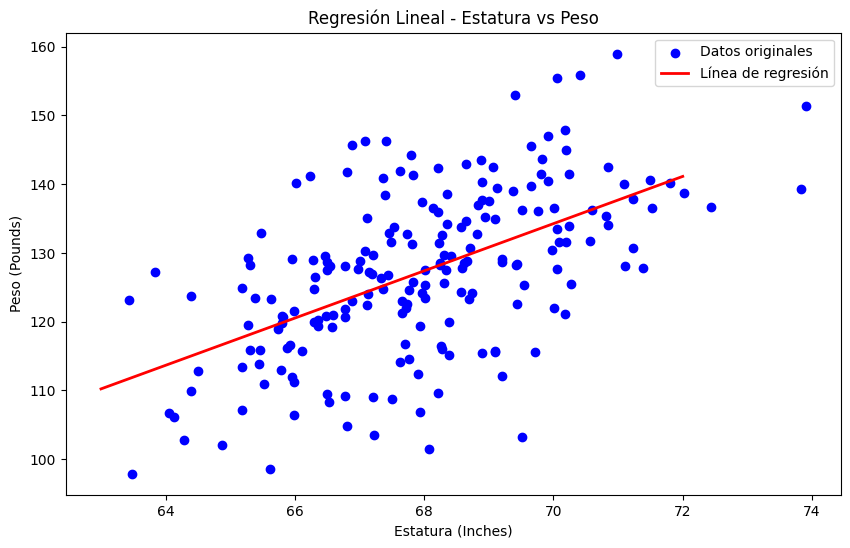

In [7]:
# 4. Hacer la grafica


X_test = X
y_test = y

# Hacer predicciones
y_pred = modelo.predict(X_test)

# Graficar los datos y el modelo
plt.figure(figsize=(10, 6))

# Datos originales
plt.scatter(height_weight_df['Height(Inches)'], height_weight_df['Weight(Pounds)'], color='blue', label='Datos originales')

# Línea de regresión
# Para la línea de regresión, se usa todo el rango de X
X_range = pd.DataFrame({'Height(Inches)': range(int(X.min()), int(X.max()))})
y_range_pred = modelo.predict(X_range)

plt.plot(X_range, y_range_pred, color='red', linewidth=2, label='Línea de regresión')

plt.xlabel('Estatura (Inches)')
plt.ylabel('Peso (Pounds)')
plt.title('Regresión Lineal - Estatura vs Peso')
plt.legend()
plt.show()


In [9]:
# 5. Hallar correlacion y valor p

# Calcular la correlación de Pearson y el valor p
corr, p_value = pearsonr(height_weight_df['Height(Inches)'], height_weight_df['Weight(Pounds)'])
print(f'Correlación de Pearson: {corr}')
print(f'Valor p: {p_value}')


Correlación de Pearson: 0.5568647346122995
Valor p: 1.1029015151265877e-17


### 6. Interpretar el valor p

El valor p de 1.1029015151265877e-17 indica que es extremadamente improbable que la correlación observada entre la estatura y el peso sea debida al azar. Por lo tanto, podemos concluir con un alto grado de confianza que existe una correlación significativa entre estas dos variables.